# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, and coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

Please show all work, keep written answers succinct and to the point and most of all, thanks for your time and good luck!

In [29]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hockey_rink import NHLRink
from PIL import Image
from matplotlib.patches import Circle, Rectangle, Arc
import math

In [30]:
# Load the dataset
data_main = pd.read_csv("Tutorial22_df.csv"); data_xG = pd.read_csv("Tutorial22_xG_df.csv")

## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## A1)
### a) The "596" team won the game against the "724" team with a score of 4-1.
### b) The "596" team emerged as the winner in the Expected Goals (xG) battle with a total xG of 4.742615, while the "724" team only managed to secure 3.221937 xG.
### c) Both teams had a similar chance of winning the match, based on their xG values. However, the actual result of the match indicates that the "724" team was not able to convert their xG values into goals as efficiently as the "596" team did. While team "596" scored 4 goals from their 4.742615 xG values, team "724" was only able to score 1 goal from their 3.221937 xG values, indicating that they underperformed in terms of converting their xG values into goals.

In [31]:
# Group the DataFrame by 'teamid' and sum the 'goal' column
goals_by_team = data_main.groupby('teamid')['goal'].sum()

# Print the resulting Series
print(goals_by_team)

teamid
596    4
724    1
Name: goal, dtype: int64


In [32]:
# Group the DataFrame by 'teamid' and sum the 'xg' column
xG_by_team = data_xG.groupby('teamid')['xg'].sum()

# Print the resulting Series
print(xG_by_team)

teamid
596    4.742615
724    3.221937
Name: xg, dtype: float64


## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## A2) 
### a) The possession with id "417" had the highest total number of successful passes.
### b) This possession had a total of 8 successful passes, which is a result of a power play situation in favor of the "724" team. With 5 skaters on the ice against the "596" team's 4 skaters, the "724" team had an advantage in terms of passing and positioning, allowing them to execute more successful passes and control the game. This ultimately led to a higher chance of scoring and an advantage in the possession game.

In [79]:
# Filtering the DataFrame only for successful passes
successful_pass_data = data_main.loc[(data_main['eventname'] == 'pass') & (data_main['outcome'] == 'successful')]

# Count the total of successful passes for each possessionid
possession_id_counts = successful_pass_data['possessionid'].value_counts()

print(possession_id_counts)

417    8
262    6
111    6
175    6
189    6
      ..
211    1
450    1
33     1
64     1
297    1
Name: possessionid, Length: 301, dtype: int64


In [50]:
# Showing the particular possessionid which had the highest total number of successful passes
data_main.loc[(data_main['possessionid']==417)].sort_values(by=['compiledgametime'])

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
872,70632,724,596,2683.6000,890686,pass,successful,outlet,417,dz,-63.117645,31.938236,5,4,0,0,0,-3,155.434324,0
890,70632,724,596,2685.5000,154967,reception,successful,regular,417,dz,-33.947052,-4.273529,5,4,0,0,0,-3,123.021302,0
900,70632,724,596,2686.0000,154967,linecarry,successful,none,417,dz,-25.900002,-6.285294,5,4,0,0,0,-3,115.071783,0
906,70632,724,596,2686.9333,154967,linecarry,successful,none,417,nz,-0.250000,-18.858822,5,4,0,0,0,-3,91.220709,0
913,70632,724,596,2688.1667,154967,linecarry,successful,none,417,oz,25.902939,-35.455879,5,4,0,0,0,-3,72.376505,0
925,70632,724,596,2688.7334,154967,pass,successful,south,417,oz,37.470589,-38.473526,5,4,0,0,0,-3,64.307795,0
929,70632,724,596,2689.3667,698619,reception,successful,regular,417,oz,30.932350,-39.479408,5,4,0,0,0,-3,70.217346,0
987,70632,724,596,2690.3667,698619,pass,successful,north,417,oz,34.955879,-39.479408,5,4,0,0,0,-3,66.928250,0
940,70632,724,596,2691.6000,154967,reception,successful,regular,417,oz,82.735291,-37.467644,5,4,0,0,0,-3,37.987773,0
951,70632,724,596,2692.5000,154967,pass,successful,north,417,oz,79.214706,-37.970589,5,4,0,0,0,-3,39.211192,0


## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## A3)
### a) Yes, the xCoord of each blueline is:
### Offensive Zone: 59.12
### Defensive Zone: -61.61
### Neutral Zone: -2.29

In [77]:
# Separate the dataset by the zone
zone_dict = {'oz': 'Offensive Zone', 'dz': 'Defensive Zone', 'nz': 'Neutral Zone'}
zone_data = {zone: data_main[data_main['zone'] == zone] for zone in zone_dict}

# Create a dictionary to hold the likely x coordinates for each zone
likely_xcoords = {}

# Loop through each zone and identify the likely x coordinate for each team
for zone, zone_name in zone_dict.items():
    
    # Group events by team and calculate the mean x coordinate
    grouped = zone_data[zone].groupby(['gameid', 'teamid']).agg({'xcoord': 'mean'})
    
    # Identify the likely x coordinate as the mean of the mean x coordinates for each team
    likely_xcoord = np.mean(grouped['xcoord'])
    
    # Add the likely x coordinate to the dictionary
    likely_xcoords[zone_name] = likely_xcoord

# Print the likely x coordinates for each zone
print('Likely x coordinates:')
for zone, xcoord in likely_xcoords.items():
    print('{}: {:.2f}'.format(zone, xcoord))

Likely x coordinates:
Offensive Zone: 59.12
Defensive Zone: -61.61
Neutral Zone: -2.29


## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## A4)
### a) Please find the attached plot below.
### b) The plot shows the shot locations for both teams in the game. From the plot, it is apparent that the "596" team scored most of their goals from the middle side of the net. On the other hand, the "724" team's only goal came from the left side of the net. However, it is essential to note that there is an outlier shot from the "596" team that was converted into a goal despite its considerable distance from the goal.

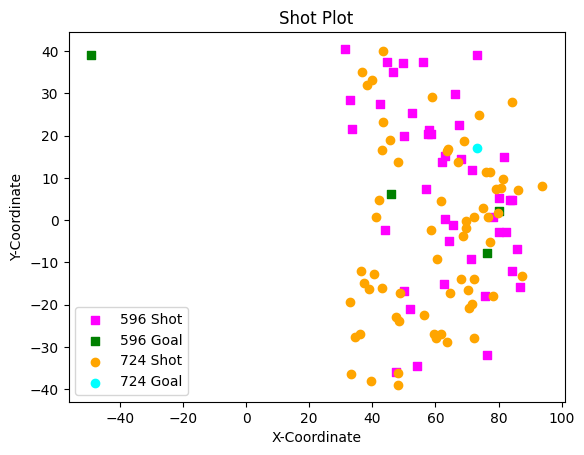

In [76]:
# Get all shots for team 596
team1_shots = data_main[(data_main['teamid'] == 596) & (data_main['eventname'] == 'shot')]

# Get all shots for team 724
team2_shots = data_main[(data_main['teamid'] == 724) & (data_main['eventname'] == 'shot')]

# Plot the shots for team 596
for index, row in team1_shots.iterrows():
    if row["goal"] == 1:
        plt.scatter(row["xcoord"], row["ycoord"], c="green", marker='s', label="596 Goal")
    else:
        plt.scatter(row["xcoord"], row["ycoord"], c="magenta", marker='s', label="596 Shot")

# Plot the shots for team 724
for index, row in team2_shots.iterrows():
    if row["goal"] == 1:
        plt.scatter(row["xcoord"], row["ycoord"], c="cyan", marker='o', label="724 Goal")
    else:
        plt.scatter(row["xcoord"], row["ycoord"], c="orange", marker='o', label="724 Shot")

# Add the legend to the plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Add title and labels to the plot
plt.title("Shot Plot")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")

# Display the plot
plt.show()

## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## A5)
### a) The furthest goal scored in the game had a distance of 143.486327 units.
### b) The expected goals (xG) value of this furthest goal is only 0.004219, which is relatively low compared to other goals. This is because the shot was taken from a very far distance away from the net, which makes it less likely to be converted into a goal. Additionally, the team that scored this goal was in a penalty kill situation, where they had only 4 skaters on ice, while the opposing team had 5 skaters on ice. This means that the team was at a disadvantage and had a lower probability of scoring a goal, resulting in a lower xG value.

In [74]:
# Define the center net coordinates
centrenet_x = 89
centrenet_y = 0

# Calculate the distance of each shot from the center net
data_main['distance'] = ((data_main['xcoord'] - centrenet_x) ** 2 + (data_main['ycoord'] - centrenet_y) ** 2) ** 0.5

# Select shots that resulted in a goal
goal_distance = data_main[data_main['goal'] == 1]

# Find the maximum distance of a goal from the center net
max_distance = goal_distance['distance'].max()

# Select the row(s) with the maximum distance value
max_distance_goal = goal_distance.nlargest(1, 'distance')

# Display the result
display(max_distance_goal)

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
954,70632,596,724,1808.0,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,143.486327,0


In [73]:
# Showing the xG value of this goal
data_xG.loc[(data_xG['compiledgametime']==1808.0)]

,teamid,compiledgametime,playerid,xg
34,596,1808.0,797810,0.004219


## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

## A6)
### a) The player who had the most assisted shots in the game is the player with "677394" playerid with 5 assisted shots throughout this game.

In [71]:
# Initialize all values to 0
data_main['shot_assist'] = 0

# Find duplicate combinations in possessionid and update "Shot Assist" accordingly
pass_success = (data_main['eventname'] == 'pass') & (data_main['outcome'] == 'successful')
rec_success = (data_main['eventname'] == 'reception') & (data_main['outcome'] == 'successful')

# Find positions of passes and receptions that are successful
pass_success_indices = np.flatnonzero(pass_success)
rec_success_indices = np.flatnonzero(rec_success)

# Find the indices of the possessions where a successful pass and reception lead to a shot
possession_indices = np.unique(data_main.iloc[rec_success_indices]['possessionid'])

# Set the value of shot_assist to 1 for the corresponding shots
shot_indices = data_main[(data_main['eventname'] == 'shot') & data_main['possessionid'].isin(possession_indices)].index
data_main.loc[shot_indices, 'shot_assist'] = 1

# Show the result
data_main

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
0,70632,596,724,2859.13330,485421,pass,successful,south,442,nz,-2.720505,-24.610668,5,5,0,0,0,3,94.964920,0
1,70632,596,724,1023.53330,485421,pass,successful,north,160,oz,31.990311,9.805882,5,4,0,0,0,2,57.846867,0
2,70632,724,596,3112.66670,628757,linecarry,successful,none,470,nz,-24.894119,-28.917648,5,5,0,0,0,-3,117.507875,0
3,70632,724,596,212.20000,673651,pass,successful,outlet,30,dz,-73.223618,37.966553,5,5,0,0,0,0,166.607206,0
4,70632,596,724,1893.66660,847481,reception,successful,regular,285,dz,-49.090302,-37.467644,5,5,0,0,0,3,143.083038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,70632,596,724,1892.93330,485421,pass,successful,outlet,285,dz,-68.705002,-21.373528,5,5,0,0,0,3,159.146773,0
1651,70632,724,596,2501.80000,698619,pass,failed,north,382,oz,29.926468,-20.870590,5,5,0,0,0,-3,62.651925,0
1652,70632,724,596,2225.73340,698619,reception,successful,regular,339,oz,67.691269,-40.985283,5,5,0,0,0,-3,46.193673,0
1653,70632,596,724,3035.30000,485421,pass,successful,outlet,462,dz,-38.424080,18.355881,5,5,0,0,0,3,128.739405,0


In [66]:
# Group data by playerid and sum the shot_assist column
shot_assist_count = data_main.groupby('playerid')['shot_assist'].sum()

# Find the player with the maximum shot assists
max_shot_assists = shot_assist_count.max()
player_with_max_shot_assists = shot_assist_count[shot_assist_count == max_shot_assists].index[0]

# Create a DataFrame with the result
result_df = pd.DataFrame({'playerid': [player_with_max_shot_assists], 'shot_assist': [max_shot_assists]})

# Show the resulting DataFrame
result_df

,playerid,shot_assist
0,677394,5


## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## A7)
### a) The goal with the highest expected goals (xG) value among those scored in the game was 0.999535. This goal was scored at compiledgametime 3553.5 by player with "290779" playerid. Despite the scoring team having only 4 skaters on the ice while the opposing team had 6, the xG value of this goal was high due to there being no opponent defending the net, making it easier for the puck to go in.
### b) No, there was no shot assist associated with this goal.

In [40]:
# Select all rows from data_main where goal equals 1 and assign it to a new DataFrame called data_goal
data_goal = data_main.loc[(data_main['goal']==1)]

# Print the resulting DataFrame
data_goal

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
249,70632,724,596,3424.83330,698619,shot,successful,slot,529,oz,73.132271,17.066551,6,5,1,1,0,-3,23.303476,1
954,70632,596,724,1808.00000,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,143.486327,0
992,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,80.266541,2.261765,5,5,1,0,0,1,9.021579,1
1156,70632,596,724,675.66670,424862,shot,successful,slot,110,oz,76.243011,-7.797058,5,5,1,0,0,0,14.951083,1
1323,70632,596,724,3553.50000,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,43.385035,0


In [63]:
# Select rows where 'goal' equals 1
data_goal = data_main[data_main['goal'] == 1]

# Create a list of compiledgametime values to filter by
time_list = [3424.83330, 1808.00000, 793.26666, 675.66670, 3553.50000]

# Filter the DataFrame by the values in time_list and find the row with the highest xG value
max_xg_row = data_xG[data_xG['compiledgametime'].isin(time_list)].nlargest(1, 'xg')

# Display the resulting DataFrame
display(max_xg_row)

,teamid,compiledgametime,playerid,xg
59,596,3553.5,290779,0.999535


In [60]:
# Filter the data_goal dataframe to only include the goal scored at compiledgametime 3553.5
highestxg_scored = data_goal[data_goal['compiledgametime'] == 3553.5].iloc[0]

# Convert the highest xG goal to a DataFrame and transpose it
result_df = pd.DataFrame(highestxg_scored).T

# Display the resulting DataFrame
result_df

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
1323,70632,596,724,3553.5,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,43.385035,0


## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## A8)
### a) To answer this question, I utilized a correlation matrix (provided below).
### b) A correlation matrix is a statistical tool that allows us to examine the relationships between different variables in a dataset. By analyzing the correlation matrix, we can identify the variables that are most strongly associated with our target variable, which in this case is goals. We can use this information to identify the most significant predictors of xG and gain a better understanding of the factors that have the greatest impact on a team's ability to score goals.
### Based on the correlation matrix, it can be concluded that 'opponent_net_empty' and 'opposingteamskatersonicecount' have the strongest correlation with the 'goal' column. Therefore, these two variables are the most significant predictors of a goal in this dataset.

In [58]:
# Get a list of all compiledgametime values from the data_xG dataframe
compiledgametimelist = data_xG['compiledgametime'].tolist()

# Filter the data_main dataframe to only include rows with compiledgametime values from compiledgametimelist
filtered_data = data_main[data_main['compiledgametime'].isin(compiledgametimelist)]

# Merge the data_xG and filtered_data dataframes on the compiledgametime column
merged_data = pd.merge(data_xG, filtered_data, on='compiledgametime')

# Select only columns with numerical data from the merged_data dataframe
num_merged_data = merged_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for the numerical columns in the num_merged_data dataframe
correlation_matrix = num_merged_data.corr()

# Show the correlation matrix
correlation_matrix

,teamid_x,compiledgametime,playerid_x,xg,gameid,teamid_y,opposingteamid,playerid_y,possessionid,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
teamid_x,1.000000,-0.230552,-0.236123,-0.160765,NaN,1.000000,-1.000000,-0.236123,-0.222723,0.055685,-0.204177,0.283910,-0.056253,-0.180640,0.191522,-0.131306,-0.876011,-0.063583,-0.052956
compiledgametime,-0.230552,1.000000,-0.064667,0.119469,NaN,-0.230552,0.230552,-0.064667,0.999626,0.027981,0.002138,0.131127,-0.056669,0.062667,0.315807,0.199040,0.124141,-0.010275,-0.044071
playerid_x,-0.236123,-0.064667,1.000000,-0.084737,NaN,-0.236123,0.236123,1.000000,-0.074764,0.002223,0.125342,0.083941,0.069881,0.010090,0.039175,-0.161475,0.350396,-0.006044,0.007538
xg,-0.160765,0.119469,-0.084737,1.000000,NaN,-0.160765,0.160765,-0.084737,0.119578,0.233791,-0.108547,-0.315574,0.353958,0.390063,-0.110227,0.704355,0.176297,-0.325982,-0.046089
gameid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamid_y,1.000000,-0.230552,-0.236123,-0.160765,NaN,1.000000,-1.000000,-0.236123,-0.222723,0.055685,-0.204177,0.283910,-0.056253,-0.180640,0.191522,-0.131306,-0.876011,-0.063583,-0.052956
opposingteamid,-1.000000,0.230552,0.236123,0.160765,NaN,-1.000000,1.000000,0.236123,0.222723,-0.055685,0.204177,-0.283910,0.056253,0.180640,-0.191522,0.131306,0.876011,0.063583,0.052956
playerid_y,-0.236123,-0.064667,1.000000,-0.084737,NaN,-0.236123,0.236123,1.000000,-0.074764,0.002223,0.125342,0.083941,0.069881,0.010090,0.039175,-0.161475,0.350396,-0.006044,0.007538
possessionid,-0.222723,0.999626,-0.074764,0.119578,NaN,-0.222723,0.222723,-0.074764,1.000000,0.026673,0.003790,0.135471,-0.063804,0.068544,0.323554,0.206269,0.113909,-0.009421,-0.047600
xcoord,0.055685,0.027981,0.002223,0.233791,NaN,0.055685,-0.055685,0.002223,0.026673,1.000000,-0.409156,0.301970,-0.098771,-0.264659,0.024148,-0.109419,0.016544,-0.974245,-0.017464


# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest!